In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder 
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv('get_around_pricing_project.csv')
df.head()

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [4]:
useless_cols= ['Unnamed: 0']
df = df.drop(useless_cols, axis=1)

df.head()

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


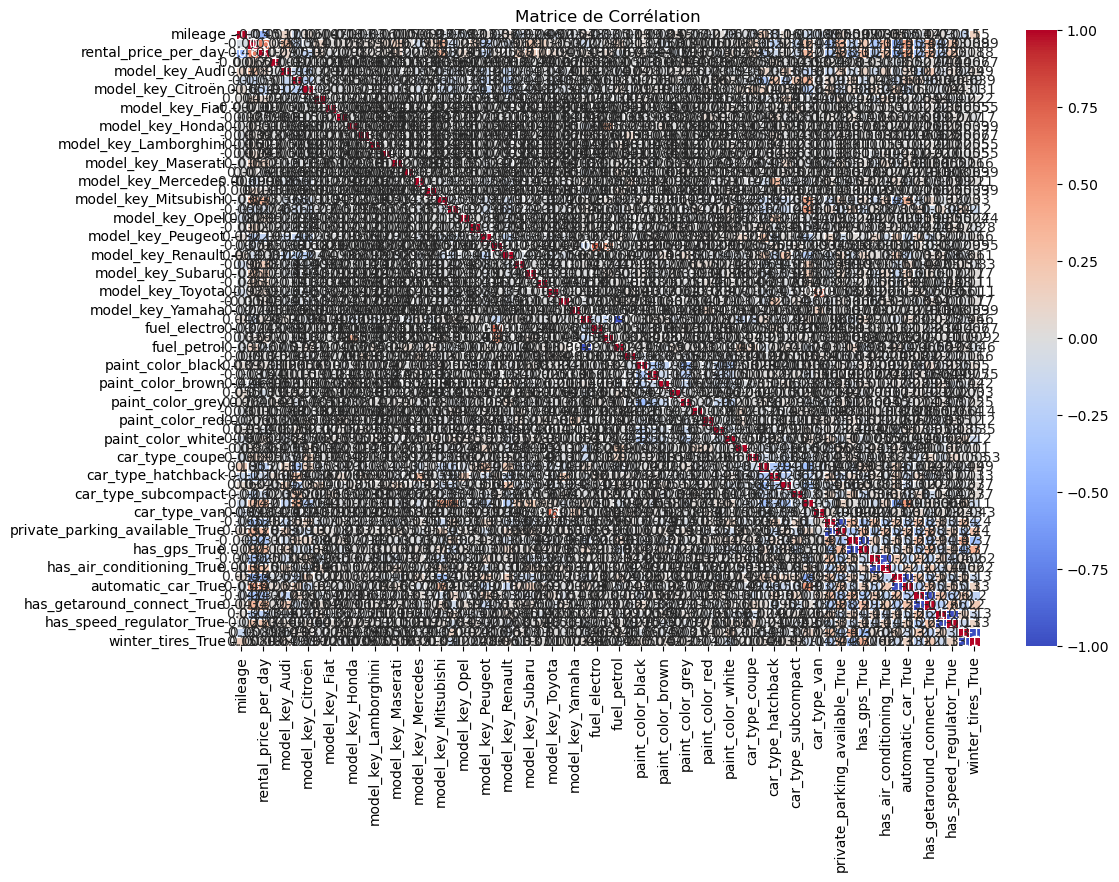

In [5]:
corr_df = pd.get_dummies(df, columns=['model_key', 'fuel','paint_color', 'car_type', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires' ])
correlation_matrix = corr_df.corr()

# Visualiser la matrice de corrélation avec un graphique (optionnel)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Matrice de Corrélation")
plt.show()

## 1- Préparation du dataset de validation

In [6]:
# shuffled_dataset = df.sample(frac=1, random_state=42)
# train_data, validation_data = train_test_split(shuffled_dataset, test_size=0.2, random_state=42)
# validation_data['rental_price_per_day'] = None

# train_data.to_csv("train_dataset.csv", index=False)
# validation_data.to_csv("validation_dataset.csv", index=False)

In [7]:
df= pd.read_csv('train_dataset.csv')
df.head()

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Peugeot,162021,90,diesel,black,estate,False,False,False,False,False,False,True,62
1,Audi,153074,160,diesel,black,sedan,False,True,False,False,False,False,True,120
2,Peugeot,145497,235,petrol,black,hatchback,True,True,True,True,True,True,True,147
3,Peugeot,60772,100,diesel,grey,estate,True,True,False,False,False,False,True,115
4,Peugeot,148429,100,diesel,silver,estate,False,True,False,False,False,True,True,102


## 2- Prépocessing

In [8]:
# Separate target variable Y from features X
target_name = 'rental_price_per_day'

print("Separating labels from features...")
Y = df.loc[:,target_name]
X = df.drop(target_name, axis = 1) # All columns are kept, except the target
print("...Done.")
print(Y.head())
print()
print(X.head())
print()


Separating labels from features...
...Done.
0     62
1    120
2    147
3    115
4    102
Name: rental_price_per_day, dtype: int64

  model_key  mileage  engine_power    fuel paint_color   car_type  \
0   Peugeot   162021            90  diesel       black     estate   
1      Audi   153074           160  diesel       black      sedan   
2   Peugeot   145497           235  petrol       black  hatchback   
3   Peugeot    60772           100  diesel        grey     estate   
4   Peugeot   148429           100  diesel      silver     estate   

   private_parking_available  has_gps  has_air_conditioning  automatic_car  \
0                      False    False                 False          False   
1                      False     True                 False          False   
2                       True     True                  True           True   
3                       True     True                 False          False   
4                      False     True                 False     

In [9]:
numeric_features = []
categorical_features = []
for i,t in X.dtypes.items():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['mileage', 'engine_power']
Found categorical features  ['model_key', 'fuel', 'paint_color', 'car_type', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']


In [10]:
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



## 3-Régression linéaire

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV


In [12]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[('encoder', OneHotEncoder(drop='first'))])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) 
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test)
print('...Done.')
print(X_test[0:5,:]) 
print()

Performing preprocessings on train set...
       model_key  mileage  engine_power    fuel paint_color   car_type  \
691          BMW   101583            85  diesel       black  hatchback   
2183     Citroën   150355           120  diesel       black      sedan   
416      Citroën    90797           135  diesel        blue      sedan   
1226     Renault   163318            85  diesel        blue     estate   
217   Volkswagen   109779           100  diesel        grey  hatchback   

      private_parking_available  has_gps  has_air_conditioning  automatic_car  \
691                       False    False                 False          False   
2183                      False     True                 False          False   
416                       False    False                 False          False   
1226                       True     True                 False          False   
217                        True     True                 False          False   

      has_getaround_connec

In [13]:
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Y_train_pred = regressor.predict(X_train)
Y_test_pred = regressor.predict(X_test)

Train model...
...Done.


In [14]:
# Print R^2 scores, quand on a fait une prédiction
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.7163708659988113
R2 score on test set :  0.6847695196451195


In [15]:
mse = mean_squared_error(Y_test, Y_test_pred)
# Calculez la RMSE en prenant la racine carrée du MSE
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 18.346987946351522


### 3.1-Gridsearch Lasso

In [16]:
print("Grid search...")
regressor = Lasso()
params = {
    'alpha': [0.0, 0.1, 0.5, 1.0]
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 3)
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

# Print R^2 scores
print("R2 score on training set : ", gridsearch.score(X_train, Y_train))
print("R2 score on test set : ", gridsearch.score(X_test, Y_test))

Grid search...


d:\Programme_D\Miniconda\envs\Daigona\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)


d:\Programme_D\Miniconda\envs\Daigona\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 319011.73972740944, tolerance: 226.22467865440464
  model = cd_fast.sparse_enet_coordinate_descent(
d:\Programme_D\Miniconda\envs\Daigona\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\Programme_D\Miniconda\envs\Daigona\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 319509.09613693133, tolerance: 228.3108290416263
  model = cd_fast.sparse_enet_coordinate_descent(
d:\Programme_D\Miniconda\envs\Daigona\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorit

...Done.
Best hyperparameters :  {'alpha': 0.0}
Best R2 score :  0.6910405676318098
R2 score on training set :  0.7163603980773883
R2 score on test set :  0.6847767173623044


d:\Programme_D\Miniconda\envs\Daigona\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 487594.0415906292, tolerance: 343.81238606001943
  model = cd_fast.sparse_enet_coordinate_descent(


### 3.2-Gridsearch Ridge

In [17]:
print("Grid search...")
regressor = Ridge()
params = {
    'alpha': [0.0, 0.1, 0.5, 1.0],
    'solver': ['cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 3)
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

# Print R^2 scores
print("R2 score on training set : ", gridsearch.score(X_train, Y_train))
print("R2 score on test set : ", gridsearch.score(X_test, Y_test))

Grid search...
...Done.
Best hyperparameters :  {'alpha': 1.0, 'solver': 'sparse_cg'}
Best R2 score :  0.6922163590513423
R2 score on training set :  0.7144090526364404
R2 score on test set :  0.6941488316287958


d:\Programme_D\Miniconda\envs\Daigona\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
24 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Programme_D\Miniconda\envs\Daigona\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Programme_D\Miniconda\envs\Daigona\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Programme_D\Miniconda\envs\Daigona\Lib\site-packages\sklearn\linear_m

### 3.3-TruncatedSVD

#### 3.3.1- test components

In [18]:
from sklearn.decomposition import TruncatedSVD

In [35]:
n_components_list= [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Créez des listes pour stocker les résultats
results = {
    'n_components': [],
    'r2_score_train': [],
    'r2_score_test': [],
    'rmse': []
}

for n_components in n_components_list:
    tsvd = TruncatedSVD(n_components=n_components)
    X_train_tsvd = tsvd.fit_transform(X_train)
    X_test_tsvd = tsvd.transform(X_test)

    scaler = StandardScaler()

# Fit and transform the data
    TSVD_train_opti_scaled = scaler.fit_transform(X_train_tsvd)
    TSVD_test_opti_scaled = scaler.transform(X_test_tsvd)

    model = LinearRegression()
    model.fit(TSVD_train_opti_scaled, Y_train)

    #prédiction
    Y_train_pred = model.predict(TSVD_train_opti_scaled)
    Y_test_pred = model.predict(TSVD_test_opti_scaled)

    r2_train= r2_score(Y_train, Y_train_pred)
    r2_test = r2_score(Y_test, Y_test_pred)

    #RMSE
    mse = mean_squared_error(Y_test, Y_test_pred)
    rmse = np.sqrt(mse)


    # Ajoutez les résultats à la liste
    results['n_components'].append(n_components)
    results['r2_score_train'].append(r2_train)
    results['r2_score_test'].append(r2_test)
    results['rmse'].append(rmse)
    
# Créez un DataFrame à partir des résultats
results_df = pd.DataFrame(results)

# Affichez le DataFrame
results_df

,n_components,r2_score_train,r2_score_test,rmse
0,2,0.595444,0.586537,21.012077
1,3,0.628224,0.629873,19.880446
2,4,0.629834,0.629313,19.895481
3,5,0.630721,0.632010,19.822967
4,6,0.631040,0.634110,19.766325
5,7,0.635459,0.638624,19.644006
6,8,0.639648,0.637692,19.669343
7,9,0.640770,0.638382,19.650591
8,10,0.645448,0.644442,19.485255


## 4-Conclusion

La régression linéaire présente un Score R2 pour le train de 0.72 et test de 0.68 et un rmse à 18.
Lasso: R2 score à 0.72 pour le train et 0.68 pour le test.
Ridge: R2 score à 0.71 pour le train et 0.69 pour le test.
TSVD: R2 score à 0.65 pour le train et 0.64 pour le test et un rmse à 19, avec 10 components.